# Exercise 3 - Multi-class Classification and Neural Networks

## 3.1 Handwritten number recognition (One-vs-all)

### Import libraries

In [1]:
from scipy.io import loadmat

import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

### Read the data

In [2]:
data = loadmat("ex3data1.mat")

X_og = data["X"]
y = data["y"]

m = X_og.shape[0]
n = X_og.shape[1] + 1

### Visualize the data

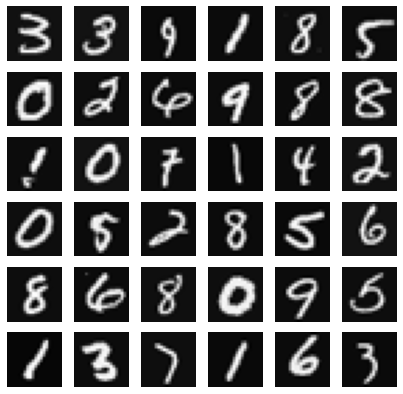

In [3]:
_, plots = plt.subplots(6, 6, figsize = (7, 7))
for i in range(6):
    for j in range(6):
        plots[i, j].imshow(X_og[np.random.randint(m)].reshape((20, 20), order = "F"), cmap = "gray")
        plots[i, j].axis("off")

### Sigmoid function

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Cost function

In [5]:
def costFunctionReg(theta, X, y, lmbda):
    m = len(y)
    J = (-1 / m) * np.sum(y.T @ np.log(sigmoid(X @ theta)) + (1 - y).T @ np.log(1 - sigmoid(X @ theta)))
    reg = (lmbda/(2*m)) * (theta[1:].T @ theta[1:])
    return (J + reg)

### Gradient function

In [6]:
def gradientDescentReg(theta, X, y, lmbda):
    m = len(y)
    grad = (1/m) * (X.T) @ (sigmoid(X @ theta) - y)
    grad[1:] += (lmbda / m) * theta[1:]
    return grad

### Test the cost function

In [7]:
theta_t = np.array([-2, -1, 1, 2])[:, np.newaxis]
X_t = np.hstack((np.ones((5, 1)), (np.array(range(1, 16)) / 10).reshape((5, 3), order = "F")))
y_t = np.array([1, 0, 1, 0, 1])[:, np.newaxis]
lmbda_t = 3
J = costFunctionReg(theta_t, X_t, y_t, lmbda_t)
grad = gradientDescentReg(theta_t, X_t, y_t, lmbda_t)

print("Cost: %f" % J)
print("Expected cost: 2.534819")
print("Gradients:")
print(" %f\n %f\n %f\n %f" % (grad[0][0], grad[1][0], grad[2][0], grad[3][0]))
print("Expected gradients:")
print(" 0.146561\n -0.548558\n 0.724722\n 1.398003")

Cost: 2.534819
Expected cost: 2.534819
Gradients:
 0.146561
 -0.548558
 0.724722
 1.398003
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003


### Train the one-vs-all classifier

In [8]:
lmbda = 0.1
k = 10
theta = np.zeros((k, n))
X = np.hstack((np.ones((m, 1)), X_og))

In [9]:
theta = np.zeros((k, n))
for i in range(k):
    digit = i if i else 10
    (theta[i], fval, times, grad_calls, warnflag) = opt.fmin_cg(f = costFunctionReg, x0 = theta[i], fprime = gradientDescentReg, args = (X, (y == digit).flatten(), lmbda), maxiter = 50, full_output = True)


         Current function value: 0.009110
         Iterations: 50
         Function evaluations: 182
         Gradient evaluations: 182
         Current function value: 0.013681
         Iterations: 50
         Function evaluations: 181
         Gradient evaluations: 181
         Current function value: 0.057451
         Iterations: 50
         Function evaluations: 141
         Gradient evaluations: 141
         Current function value: 0.061950
         Iterations: 50
         Function evaluations: 139
         Gradient evaluations: 139
         Current function value: 0.037393
         Iterations: 50
         Function evaluations: 154
         Gradient evaluations: 154
         Current function value: 0.060109
         Iterations: 50
         Function evaluations: 134
         Gradient evaluations: 134
         Current function value: 0.020034
         Iterations: 50
         Function evaluations: 175
         Gradient evaluations: 175
         Current function value: 0.033821
      

### Accuracy of the model

In [10]:
pred = np.argmax(sigmoid(X @ theta.T), axis = 1)
pred = [i if i else 10 for i in pred]

print("Train Accuracy: %5.3f" % (np.mean(pred == y.flatten()) * 100))

Train Accuracy: 95.140


### Show some random predictions

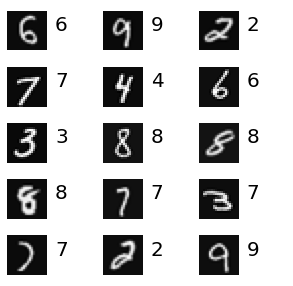

In [11]:
_, pred_plots = plt.subplots(5, 6, figsize = (5, 5))
for i in range(5):
    for j in range(0, 6, 2):
        random_X = X_og[np.random.randint(m - 1)]
        random_pred = np.argmax(sigmoid(theta @ np.insert(random_X, 0, 1, axis = 0)), axis = 0)
        
        pred_plots[i, j].imshow(random_X.reshape((20, 20), order = "F"), cmap = "gray")
        pred_plots[i, j].axis("off")
        pred_plots[i, j+1].axis("off")
        pred_plots[i, j+1].text(0, 0.5, str(random_pred), fontsize = 20)
